In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Вариант 8 (Задача №1, Датасет №8)**

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

# **Описание датасета**

Датасет содержит информацию, собранную Службой переписи населения США о жилье в районе Бостона, штат Массачусетс. Были выбраны 506 различных жилых помещений и для каждого из них указаны следующие значения (соответственно, колонки таблицы):
- CRIM - уровень преступности на душу населения по городам
- ZN - доля земель под жилую застройку зонирована под участки площадью более 25 000 кв. футов.
- INDUS - доля акров неторгового бизнеса на город.
- CHAS - Фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)
- NOX - концентрация оксидов азота (частиц на 10 миллионов)
- RM - среднее количество комнат в квартире
- AGE - доля жилых единиц, построенных до 1940 г.
- DIS - взвешенные расстояния до пяти центров занятости Бостона
- RAD - индекс доступности к радиальным магистралям
- TAX - полная ставка налога на имущество на 10 000 долларов США
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих
- LSTAT - % населения низкого статуса
- MEDV - Средняя стоимость домов, занимаемых владельцами (тысяч долларов)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/drive/My Drive/МГТУ/6 семестр/ТМО/РК1/HousingData.csv'
ds = pd.read_csv(filename)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
ds = pd.DataFrame(ds)
display(ds)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,NaN,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,NaN,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


In [11]:
ds.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
5,0.03,0.00,2.18,0.00,0.46,6.43,58.70,6.06,3,222,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.18,0.00,9.69,0.00,0.58,5.57,73.50,2.40,6,391,19.20,395.77,15.10,17.50
500,0.22,0.00,9.69,0.00,0.58,6.03,79.70,2.50,6,391,19.20,396.90,14.33,16.80
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90


In [12]:
ds.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.00,486.00,486.00,486.00,506.00,506.00,486.00,506.00,506.00,506.00,506.00,506.00,486.00,506.00
mean,3.61,11.21,11.08,0.07,0.55,6.28,68.52,3.80,9.55,408.24,18.46,356.67,12.72,22.53
std,8.72,23.39,6.84,0.26,0.12,0.70,28.00,2.11,8.71,168.54,2.16,91.29,7.16,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.17,2.10,4.00,279.00,17.40,375.38,7.12,17.02
50%,0.25,0.00,9.69,0.00,0.54,6.21,76.80,3.21,5.00,330.00,19.05,391.44,11.43,21.20
75%,3.56,12.50,18.10,0.00,0.62,6.62,93.97,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [13]:
# уникальные значения целевого признака
ds['MEDV'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

# **Jointplot**

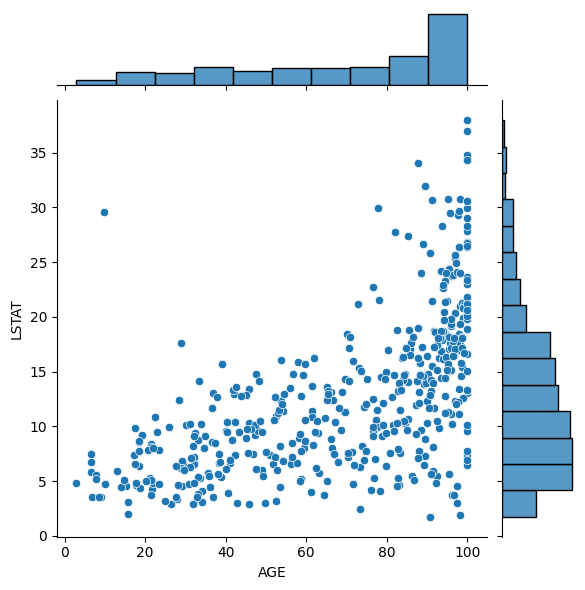

In [18]:
sns.jointplot(x='AGE', y='LSTAT', data=ds)

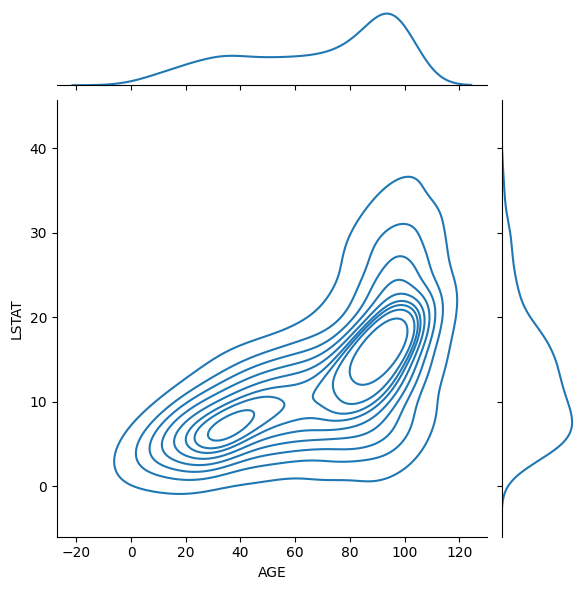

In [21]:
sns.jointplot(x='AGE', y='LSTAT', data=ds, kind="kde")

<Axes: xlabel='LSTAT', ylabel='Count'>

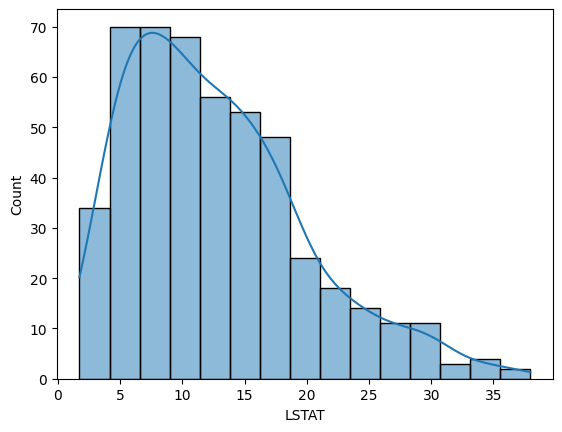

In [24]:
sns.histplot(ds['LSTAT'], kde=True)

<Axes: xlabel='LSTAT'>

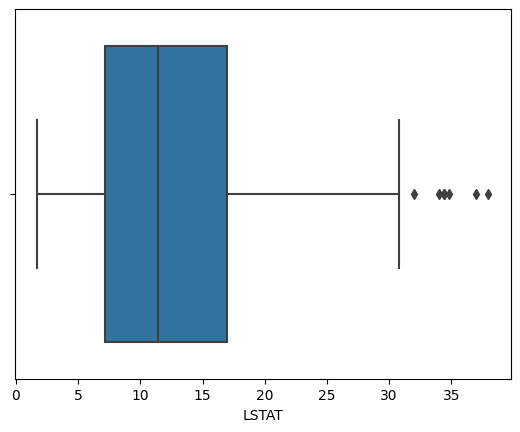

In [25]:
sns.boxplot(x=ds['LSTAT'])

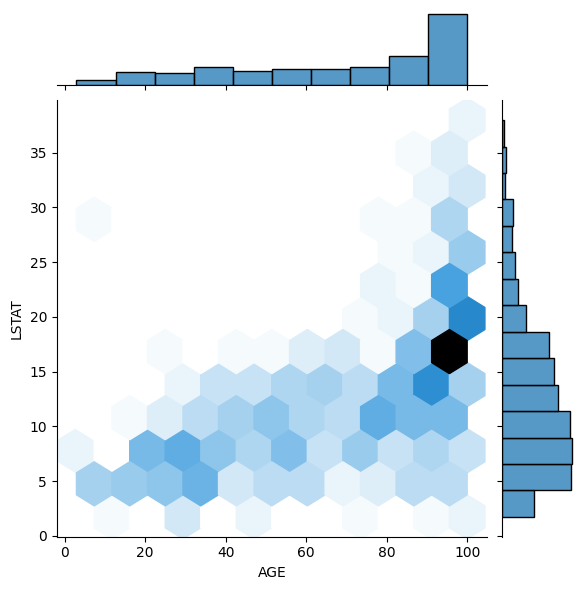

In [26]:
sns.jointplot(x='AGE', y='LSTAT', data=ds, kind="hex")

# **Корреляционный анализ**

In [27]:
ds.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.19,0.40,-0.05,0.42,-0.22,0.35,-0.37,0.62,0.58,0.28,-0.38,0.44,-0.39
ZN,-0.19,1.00,-0.53,-0.04,-0.51,0.32,-0.56,0.66,-0.31,-0.31,-0.41,0.17,-0.41,0.37
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.73,0.39,-0.36,0.59,-0.48
CHAS,-0.05,-0.04,0.06,1.00,0.08,0.10,0.08,-0.09,0.00,-0.03,-0.11,0.05,-0.05,0.18
NOX,0.42,-0.51,0.76,0.08,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.58,-0.43
RM,-0.22,0.32,-0.39,0.10,-0.30,1.00,-0.25,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.56,0.64,0.08,0.73,-0.25,1.00,-0.74,0.46,0.51,0.27,-0.28,0.60,-0.39
DIS,-0.37,0.66,-0.71,-0.09,-0.77,0.21,-0.74,1.00,-0.49,-0.53,-0.23,0.29,-0.49,0.25
RAD,0.62,-0.31,0.60,0.00,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.48,-0.38
TAX,0.58,-0.31,0.73,-0.03,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


На основе корреляционной матрицы можно сделать следующие выводы:

1. Целевой признак наиболее сильно коррелирует с признаками RM(0,70), ZN(0,37). Эти признаки должны остаться в модели.
2. Целевой признак наименее коррелирует с признаком LSTAT(-0,74) (доля низкообеспеченного населения), его можно убрать из модели.
3. Многие признаки (TAX, PTRATIO, INDUS) плохо коррелируют с целевым, поэтому их тоже можно убрать из модели, так как они почти не будут оказывать влияния.